# cygnus-multicore

In [1]:
from collections import defaultdict
from importlib import reload
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np
from utils import plots, stats, tables, utils

# Configuration

In [2]:
base_dir = '/u/cmolder/GitHub/ChampSim/out/cygnus/'
suites = [
    #('spec06', 'one_phase'),
    ('spec06', 'weighted'),
    ('spec17', 'weighted'),
    ('cloudsuite', 'weighted'),
    ('gap', 'one_phase'),
    ('google', 'one_phase'),
    ('mixes', 'one_phase'),
]
metrics  = [
    'ipc_improvement',
]
features = [
    {'Delta_Path', 'PC_Delta'}, 
]
baselines = ['spp_dev2', 'spp_ppf_dev', 'bingo']

dpi = 150
colors = defaultdict(lambda : None, {
    'Cygnus': colormaps['Set3'](0), #colormaps['Oranges'](0.65),
    'Pythia': colormaps['Set3'](2), #colormaps['Blues'](0.65),
    
    'Bingo':   colormaps['Set3'](3), #'purple',
    'SPP':     colormaps['Set3'](5), #'royalblue',
    'SPP+PPF': colormaps['Set3'](6), #'darkturquoise',
})
hatches = defaultdict(lambda : None, {
    # 'Pythia': '\\\\',
    
    # 'Cygnus Depth': '//',
    # 'Cygnus': '//',

    # 'Bingo': '.',
    # 'SPP': 'x',
    # 'SPP+PPF': 'x',
})

In [3]:
dfs = {
    # ===
    # ===== 1-core, 1200 MTPS, dynamic degree =====
    # ===
    'degreedyn/baseline': tables.load_stats_csv(
        base_dir, 'degreedyn/baseline.csv', baselines, prefetchers_level='l2'),

    'degreedyn/pythia/bwaware3': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/pythia/bwaware3.csv', feature_sets=features),

    'degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio.csv',
        feature_sets=features, feature_key='cygnus_features'),

    # ===
    # ===== 2-core, 2400 MTPS, dynamic degree =====
    # ===
    '2core_2400mtps_degreedyn/baseline': tables.load_stats_csv(
        base_dir, '2core_2400mtps_degreedyn/baseline.csv', baselines, prefetchers_level='l2'),

    '2core_2400mtps_degreedyn/pythia/bwaware3': tables.load_stats_csv_pythia(
        base_dir, '2core_2400mtps_degreedyn/pythia/bwaware3.csv', feature_sets=features),

    '2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real': tables.load_stats_csv_pythia(
        base_dir, '2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real.csv',
        feature_sets=features, feature_key='cygnus_features'),    

    '2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio': tables.load_stats_csv_pythia(
        base_dir, '2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio.csv',
        feature_sets=features, feature_key='cygnus_features'),

    '2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/-1.0prefetch': tables.load_stats_csv_pythia(
        base_dir, '2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/-1.0prefetch.csv',
        feature_sets=features, feature_key='cygnus_features'),

    '2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/-2.0prefetch': tables.load_stats_csv_pythia(
        base_dir, '2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/-2.0prefetch.csv',
        feature_sets=features, feature_key='cygnus_features'),

    '2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/0.0prefetch': tables.load_stats_csv_pythia(
        base_dir, '2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/0.0prefetch.csv',
        feature_sets=features, feature_key='cygnus_features'),

    '2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/1.0prefetch': tables.load_stats_csv_pythia(
        base_dir, '2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/1.0prefetch.csv',
        feature_sets=features, feature_key='cygnus_features'),

    '2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/2.0prefetch': tables.load_stats_csv_pythia(
        base_dir, '2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/2.0prefetch.csv',
        feature_sets=features, feature_key='cygnus_features'),

    '2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/3.0prefetch': tables.load_stats_csv_pythia(
        base_dir, '2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/3.0prefetch.csv',
        feature_sets=features, feature_key='cygnus_features'),

    # ===
    # ===== 4-core, 4800 MTPS, dynamic degree =====
    # ===
    '4core_4800mtps_degreedyn/baseline': tables.load_stats_csv(
        base_dir, '4core_4800mtps_degreedyn/baseline.csv', baselines, prefetchers_level='l2'),

    '4core_4800mtps_degreedyn/pythia/bwaware3': tables.load_stats_csv_pythia(
        base_dir, '4core_4800mtps_degreedyn/pythia/bwaware3.csv', feature_sets=features),

    '4core_4800mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio': tables.load_stats_csv_pythia(
        base_dir, '4core_4800mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio.csv',
        feature_sets=features, feature_key='cygnus_features'),
}

# Plots

## 2-core

### 2400 MTPS

In [4]:
df_2core_2400mtps = {
    'Cygnus': dfs['2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio']['Delta_Path, PC_Delta'],
    # 'Cygnus -3.0': dfs['2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real']['Delta_Path, PC_Delta'],
    # 'Cygnus -2.0': dfs['2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/-2.0prefetch']['Delta_Path, PC_Delta'],
    # 'Cygnus -1.0': dfs['2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/-1.0prefetch']['Delta_Path, PC_Delta'],
    # 'Cygnus 0.0': dfs['2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/0.0prefetch']['Delta_Path, PC_Delta'],
    # 'Cygnus 1.0': dfs['2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/1.0prefetch']['Delta_Path, PC_Delta'],
    # 'Cygnus 2.0': dfs['2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/2.0prefetch']['Delta_Path, PC_Delta'],
    # 'Cygnus 3.0': dfs['2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_threshold/3.0prefetch']['Delta_Path, PC_Delta'],
    
    'Pythia': dfs['2core_2400mtps_degreedyn/pythia/bwaware3']['Delta_Path, PC_Delta'],

    'Bingo': dfs['2core_2400mtps_degreedyn/baseline']['bingo'],
    'SPP': dfs['2core_2400mtps_degreedyn/baseline']['spp_dev2'],
    'SPP+PPF': dfs['2core_2400mtps_degreedyn/baseline']['spp_ppf_dev'],
}

df_2core_2400mtps_legend_kwargs = {
    'fontsize': 7,
    'ncol': 5,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0.0,
}

df_2core_2400mtps_label_kwargs = {
    'rotation': 0,
    'ha': 'center',
    'fontsize': 7,
}

#### IPC improvement

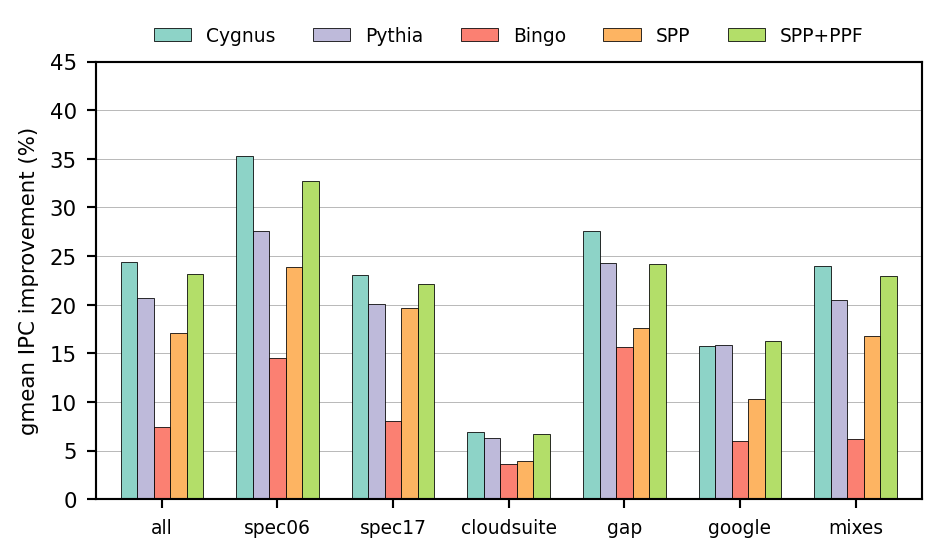

In [5]:
reload(plots)
plots.plot_metric_means(df_2core_2400mtps, suites=suites, metric='ipc_improvement',
                        colors=colors, hatches=hatches,
                        legend_kwargs=df_2core_2400mtps_legend_kwargs,
                        label_kwargs=df_2core_2400mtps_label_kwargs,
                        add_suptitle=False,
                        add_xlabel=False,
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5,
                        ylim=(0, 45),
                        dpi=192, figsize=(5, 3))

=== spec06 weighted ===
=== spec17 weighted ===
=== cloudsuite weighted ===
=== gap one_phase ===
=== google one_phase ===


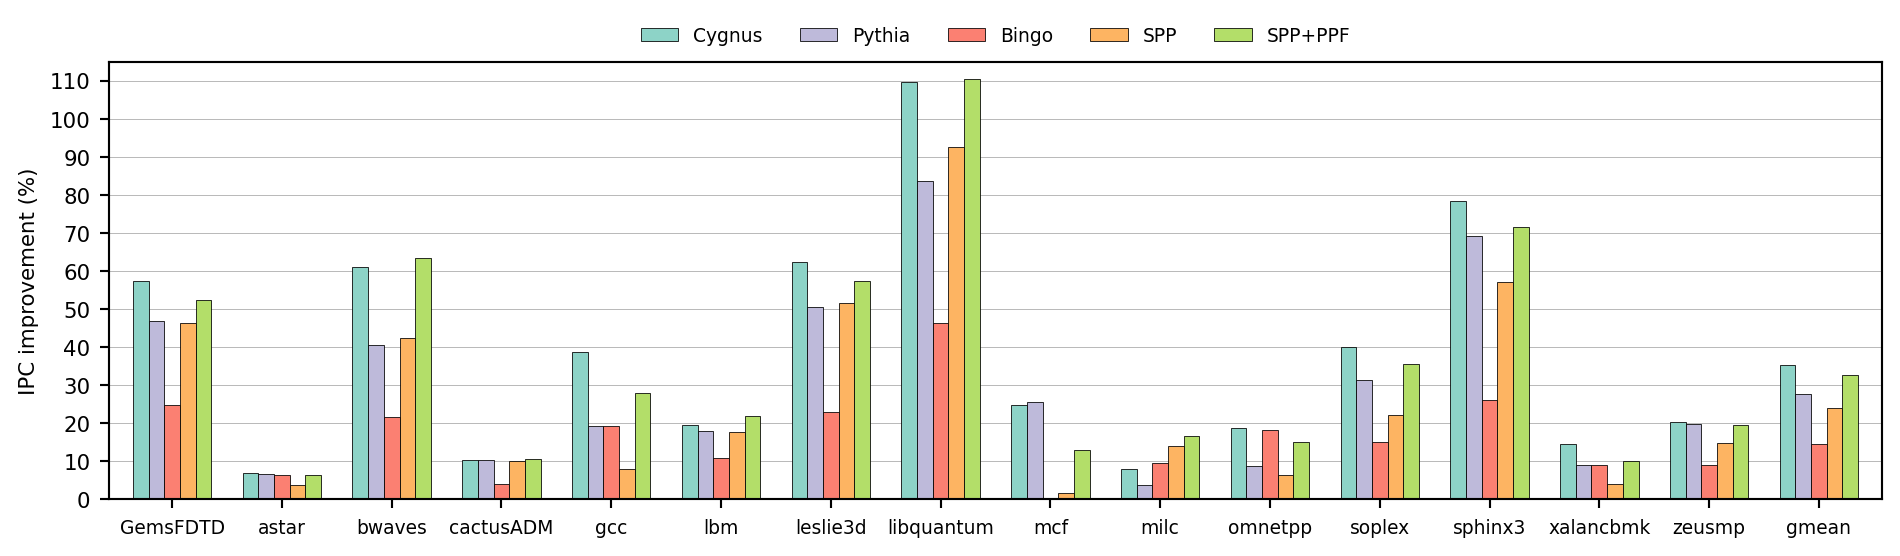

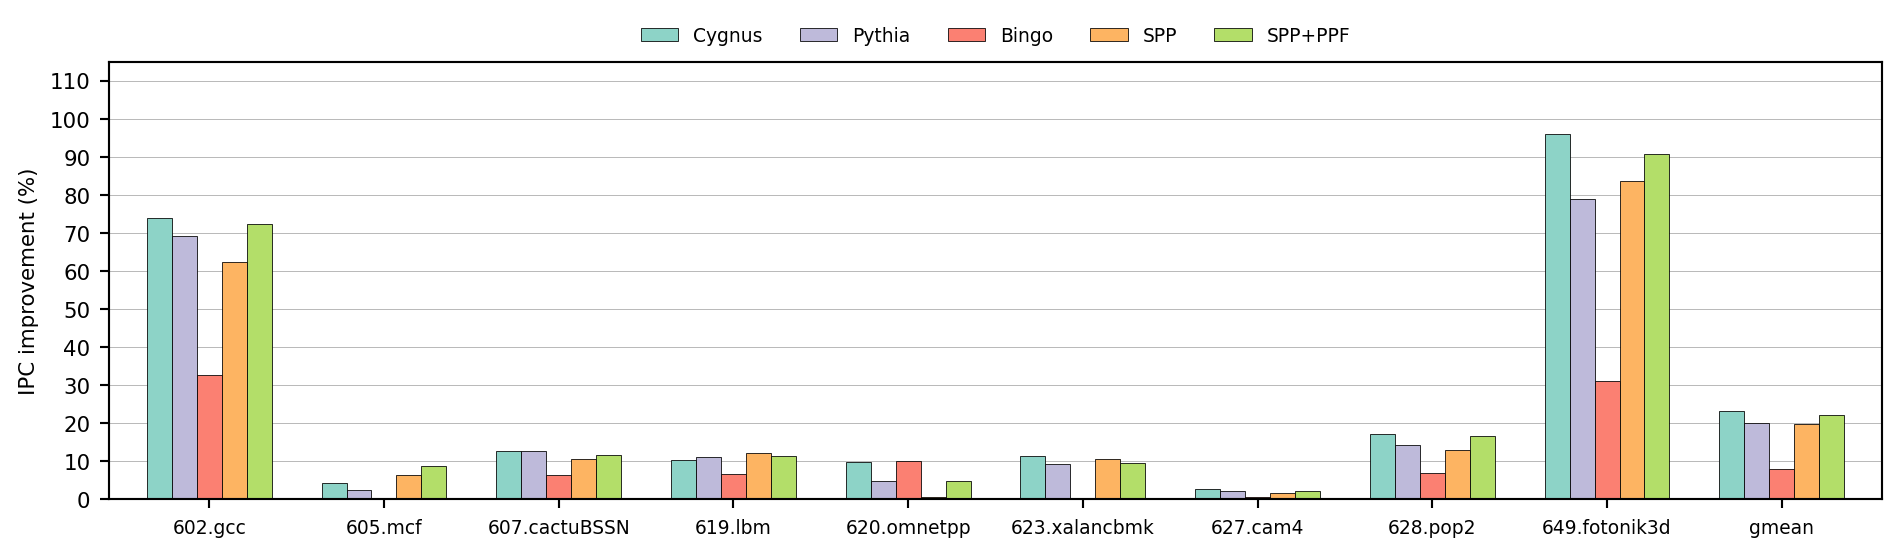

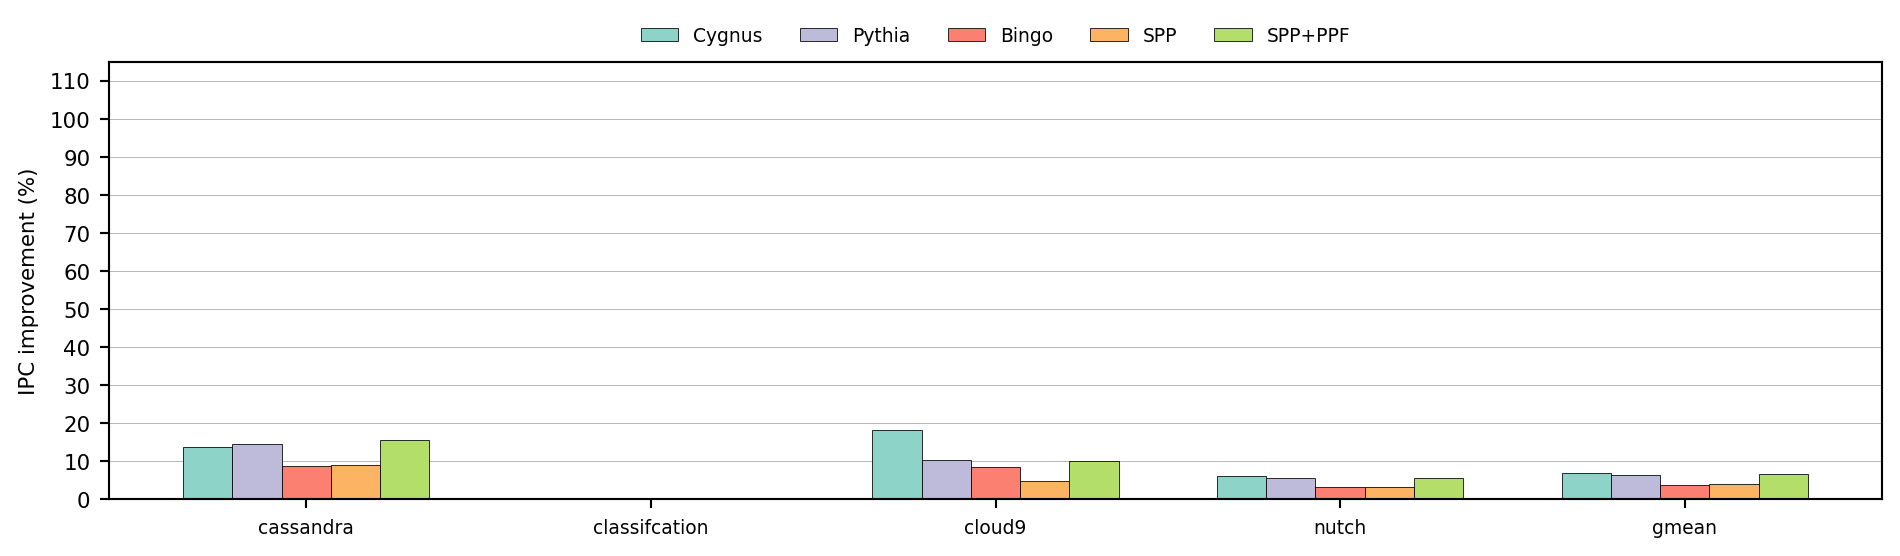

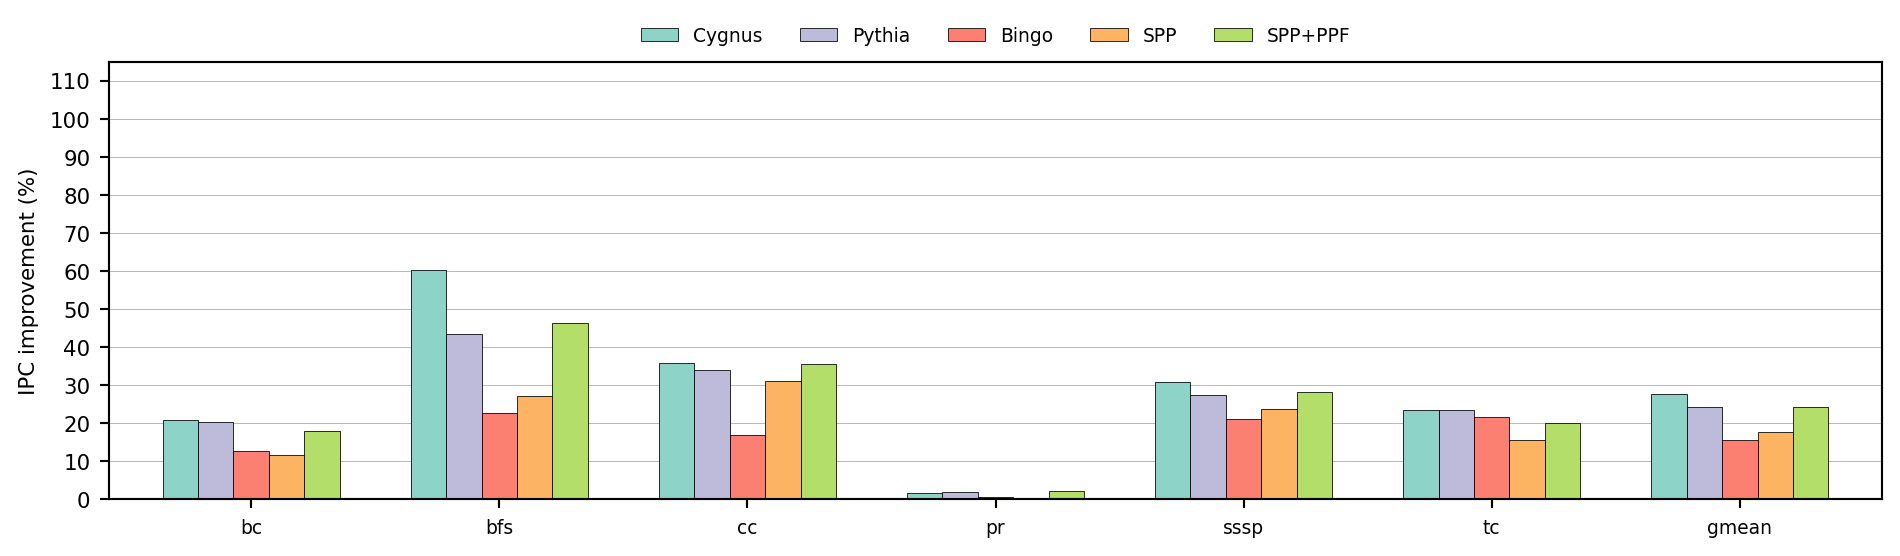

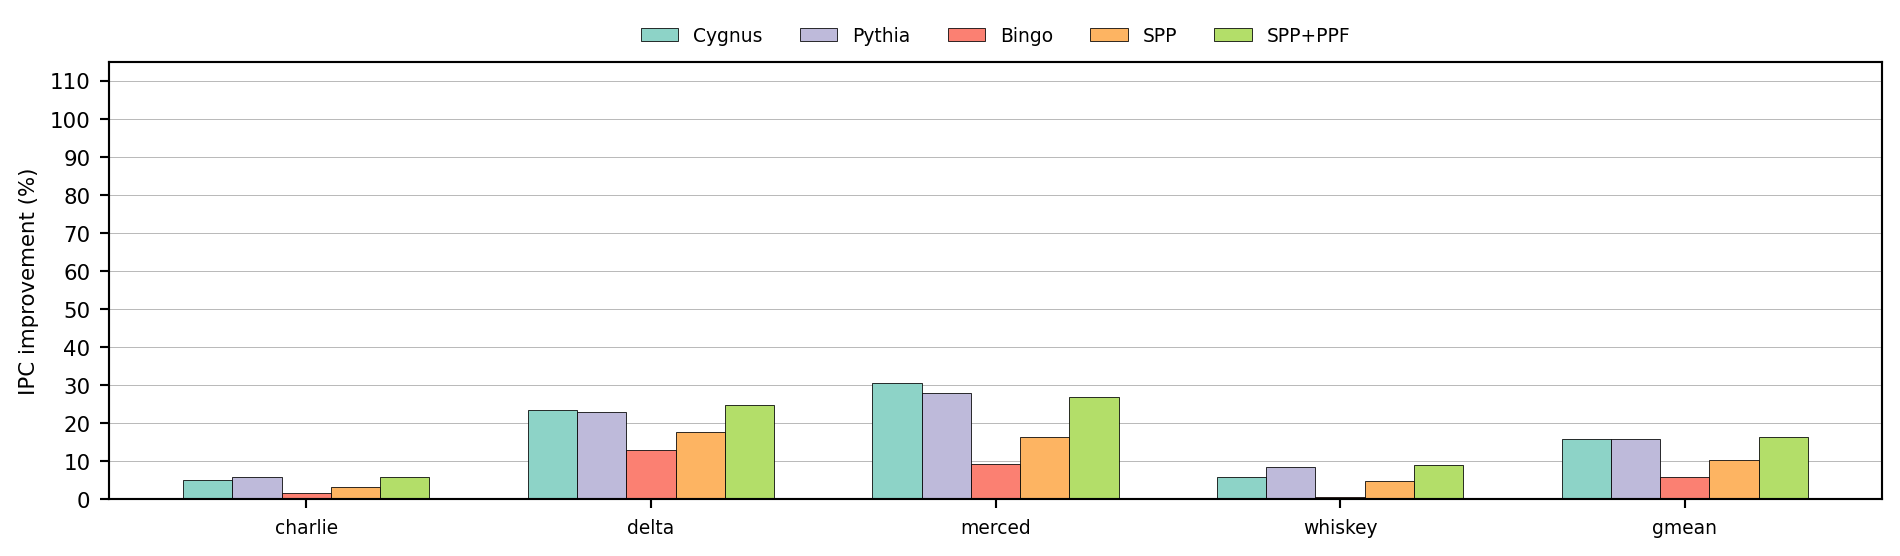

In [6]:
reload(plots)
plots.plot_everything(df_2core_2400mtps, 
                      suites=[(s, p) for s, p in suites if s != 'mixes'], 
                      metrics=['ipc_improvement'], 
                      colors=colors, hatches=hatches,
                      legend_kwargs=df_2core_2400mtps_legend_kwargs,
                      label_kwargs=df_2core_2400mtps_label_kwargs,
                      add_suptitle=False,
                      add_xlabel=False,
                      ylabel='IPC improvement (%)',
                      ytick_distance=10,
                      ylim=(0, 115),
                      dpi=192, figsize=(10, 3))

#### Overpredictions

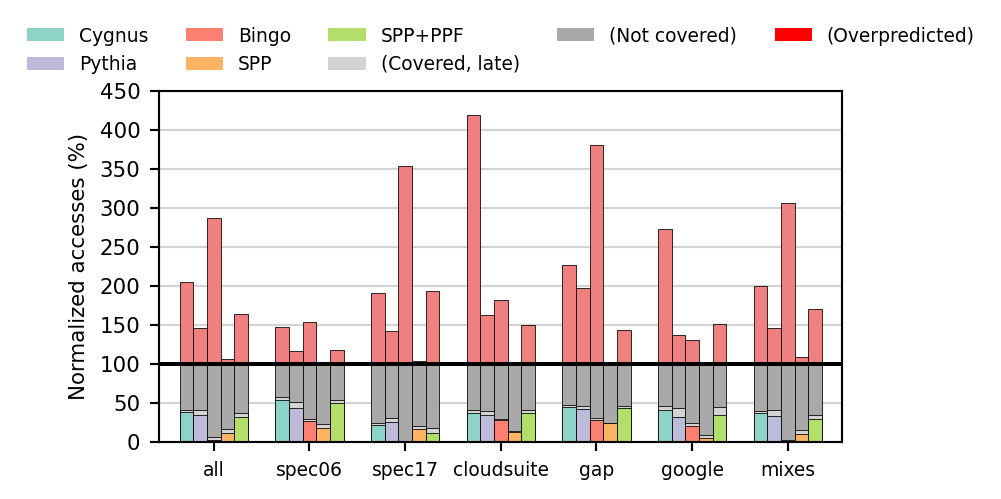

In [7]:
plots.plot_overprediction_means(df_2core_2400mtps, suites=suites,
                                colors=colors, hatches=hatches,
                                legend_kwargs=df_2core_2400mtps_legend_kwargs,
                                label_kwargs=df_2core_2400mtps_label_kwargs,
                                add_suptitle=False, add_xlabel=False,
                                ymin=0, ymax=450,
                                ytick_distance=50,
                                dpi=192, figsize=(5, 2.7))

=== spec06 weighted ===
=== spec17 weighted ===
=== cloudsuite weighted ===
=== gap one_phase ===
=== google one_phase ===


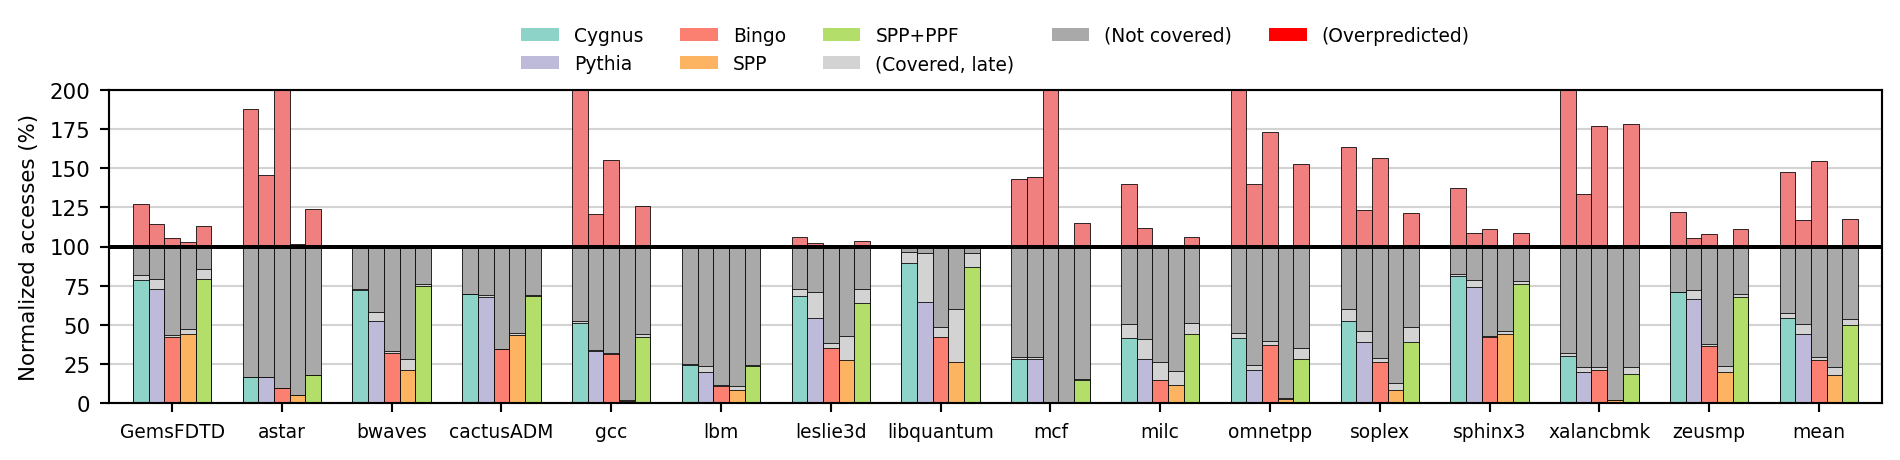

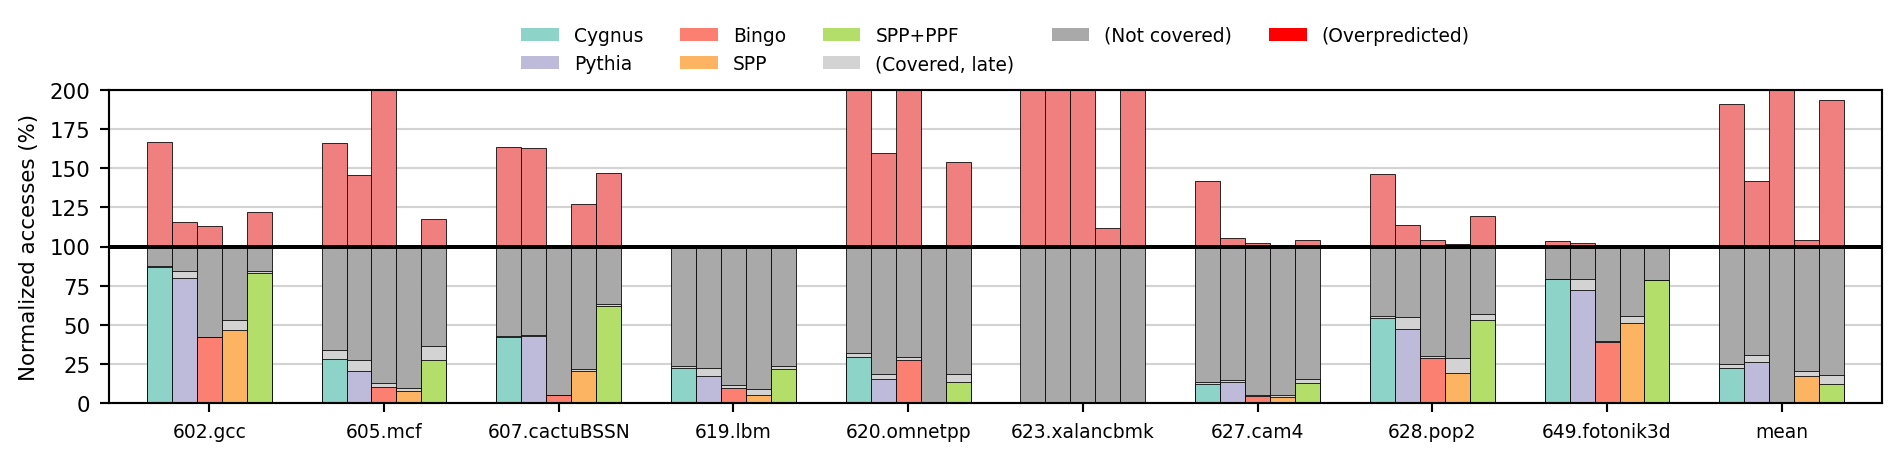

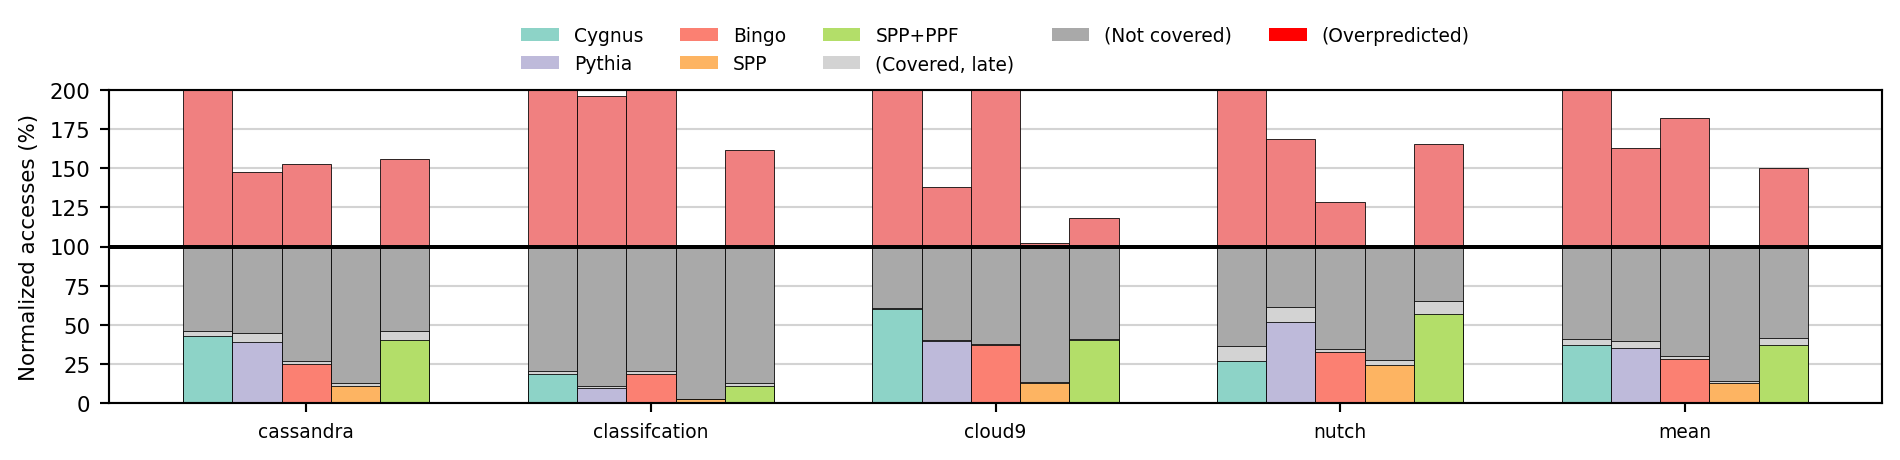

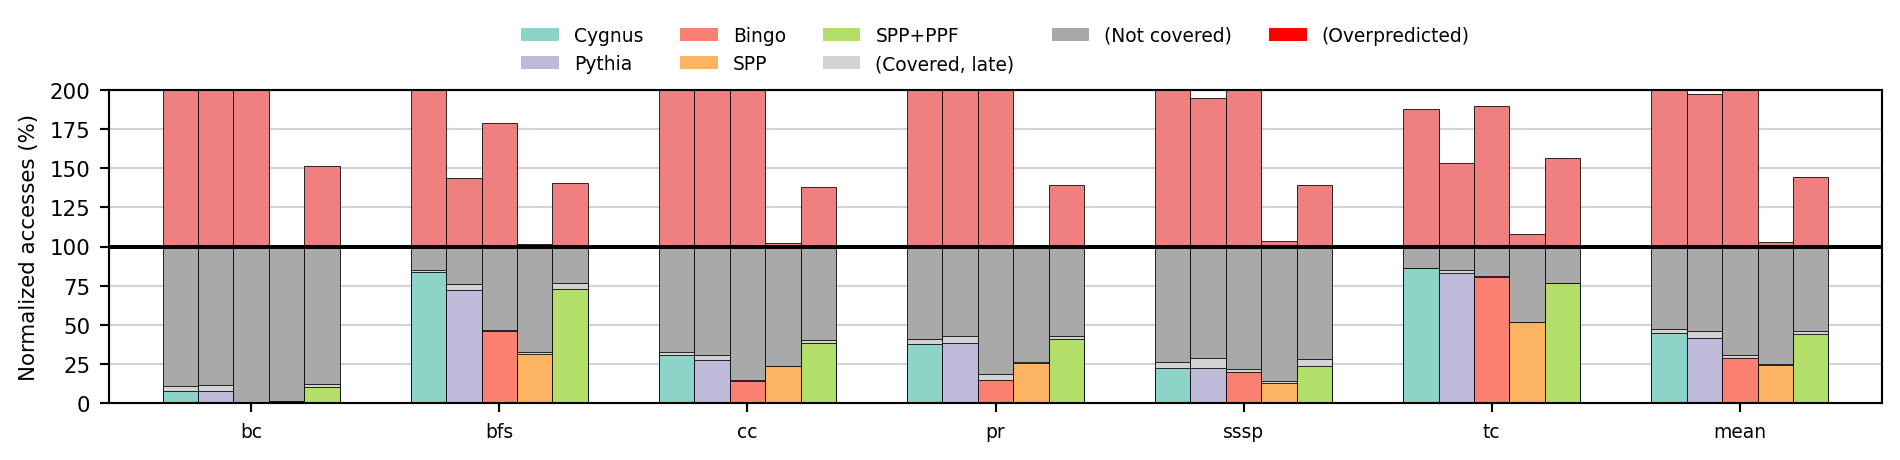

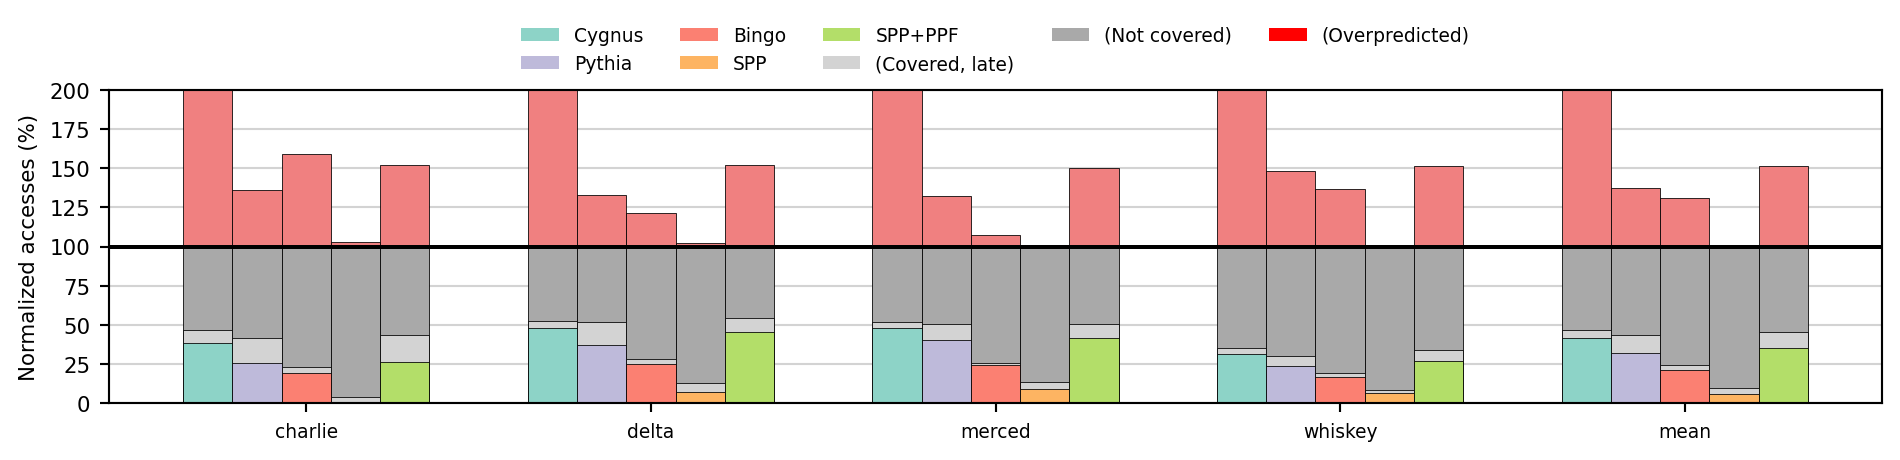

In [8]:
plots.plot_everything_overpredictions(df_2core_2400mtps, 
                                      suites=[(s, p) for s, p in suites if s != 'mixes'],
                                      level='L2C', 
                                      colors=colors, hatches=hatches,
                                      legend_kwargs=df_2core_2400mtps_legend_kwargs,
                                      label_kwargs=df_2core_2400mtps_label_kwargs,
                                      add_suptitle=False, add_xlabel=False,
                                      #ylabel='Prefetch coverage (%)',
                                      ytick_distance=25,
                                      ymin=0, ymax=200,
                                      annotate_outliers = False,
                                      dpi=192, figsize=(10, 2.5))

## 4-core 

### 4800 MTPS

In [9]:
df_4core_4800mtps = {
    'Cygnus': dfs['4core_4800mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio']['Delta_Path, PC_Delta'],
    
    'Pythia': dfs['4core_4800mtps_degreedyn/pythia/bwaware3']['Delta_Path, PC_Delta'],

    'Bingo': dfs['4core_4800mtps_degreedyn/baseline']['bingo'],
    'SPP': dfs['4core_4800mtps_degreedyn/baseline']['spp_dev2'],
    'SPP+PPF': dfs['4core_4800mtps_degreedyn/baseline']['spp_ppf_dev'],
}

df_4core_4800mtps_legend_kwargs = {
    'fontsize': 7,
    'ncol': 5,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0.0,
}

df_4core_4800mtps_label_kwargs = {
    'rotation': 0,
    'ha': 'center',
    'fontsize': 7,
}

#### IPC improvement

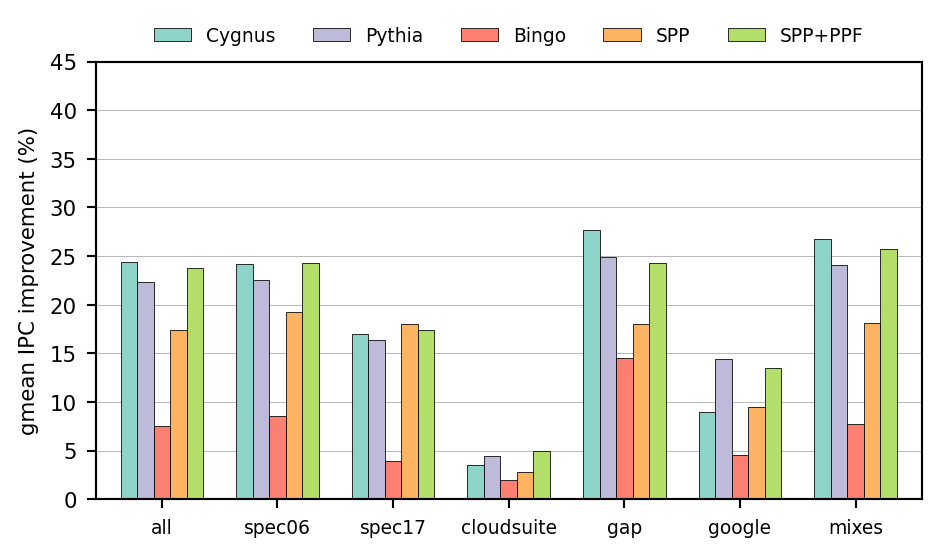

In [10]:
reload(plots)
plots.plot_metric_means(df_4core_4800mtps, suites=suites, metric='ipc_improvement',
                        colors=colors, hatches=hatches,
                        legend_kwargs=df_4core_4800mtps_legend_kwargs,
                        label_kwargs=df_4core_4800mtps_label_kwargs,
                        add_suptitle=False,
                        add_xlabel=False,
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5,
                        ylim=(0, 45),
                        dpi=192, figsize=(5, 3))

=== spec06 weighted ===
=== spec17 weighted ===
=== cloudsuite weighted ===
=== gap one_phase ===
=== google one_phase ===


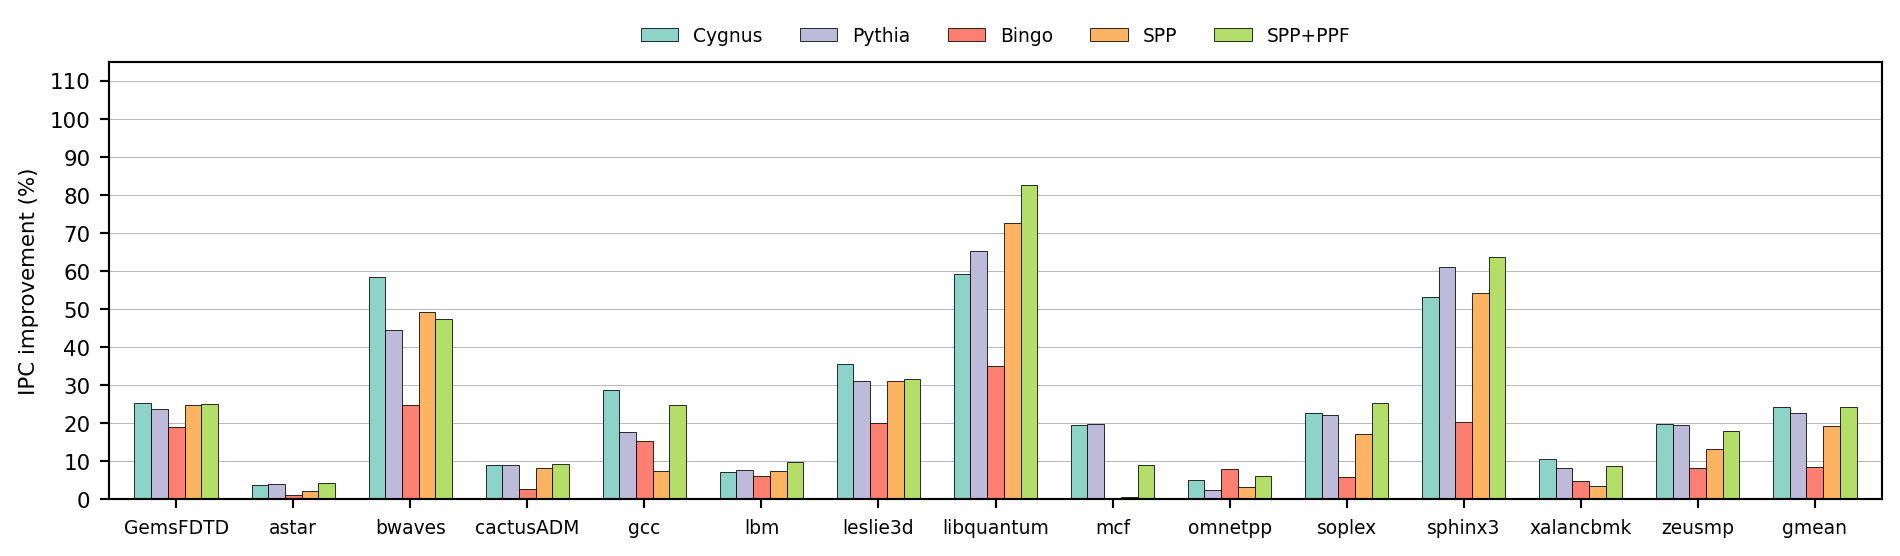

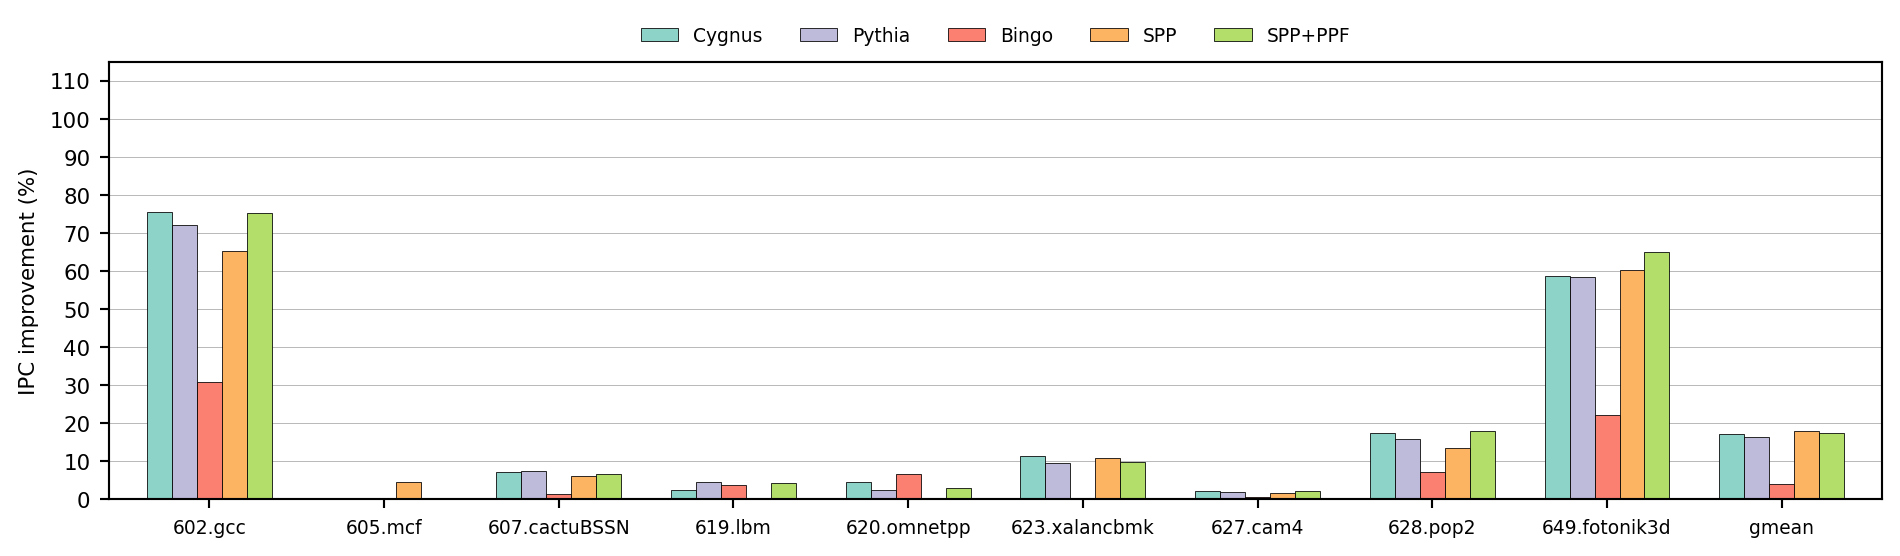

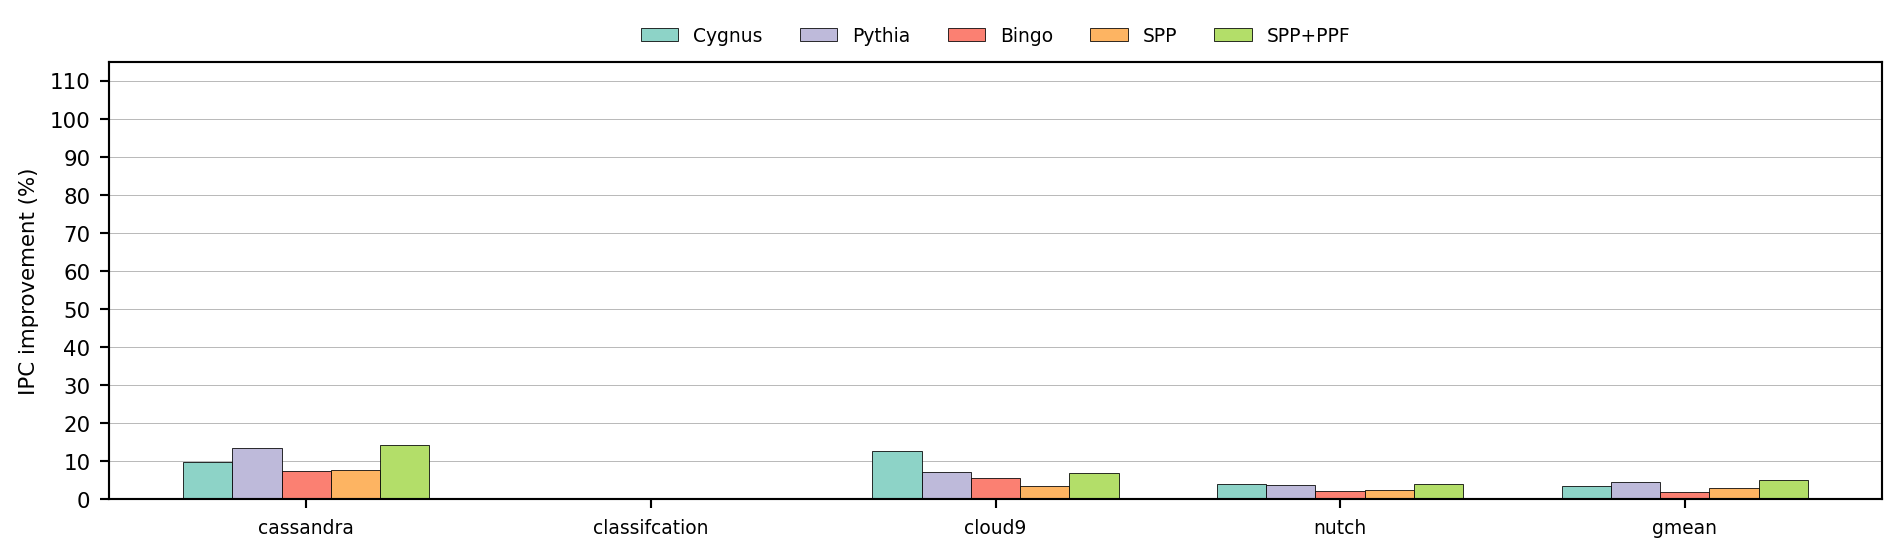

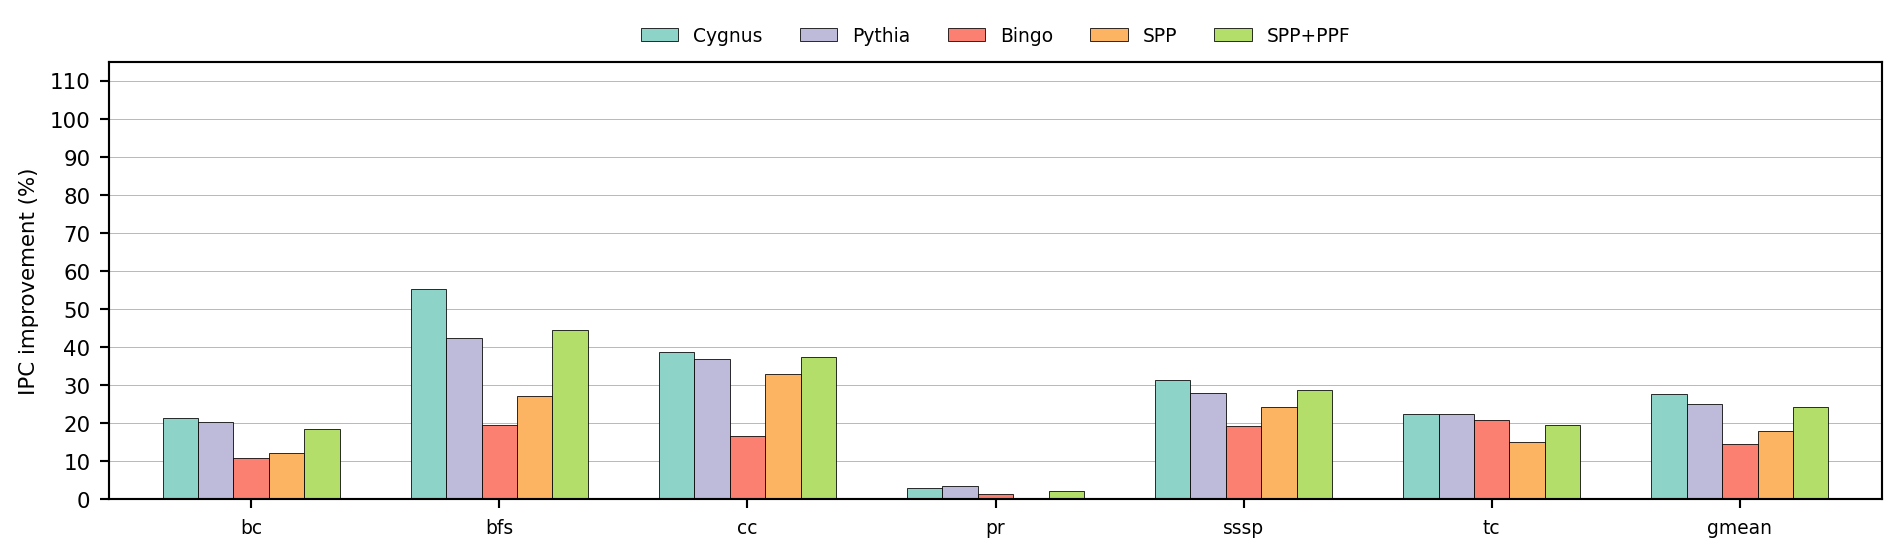

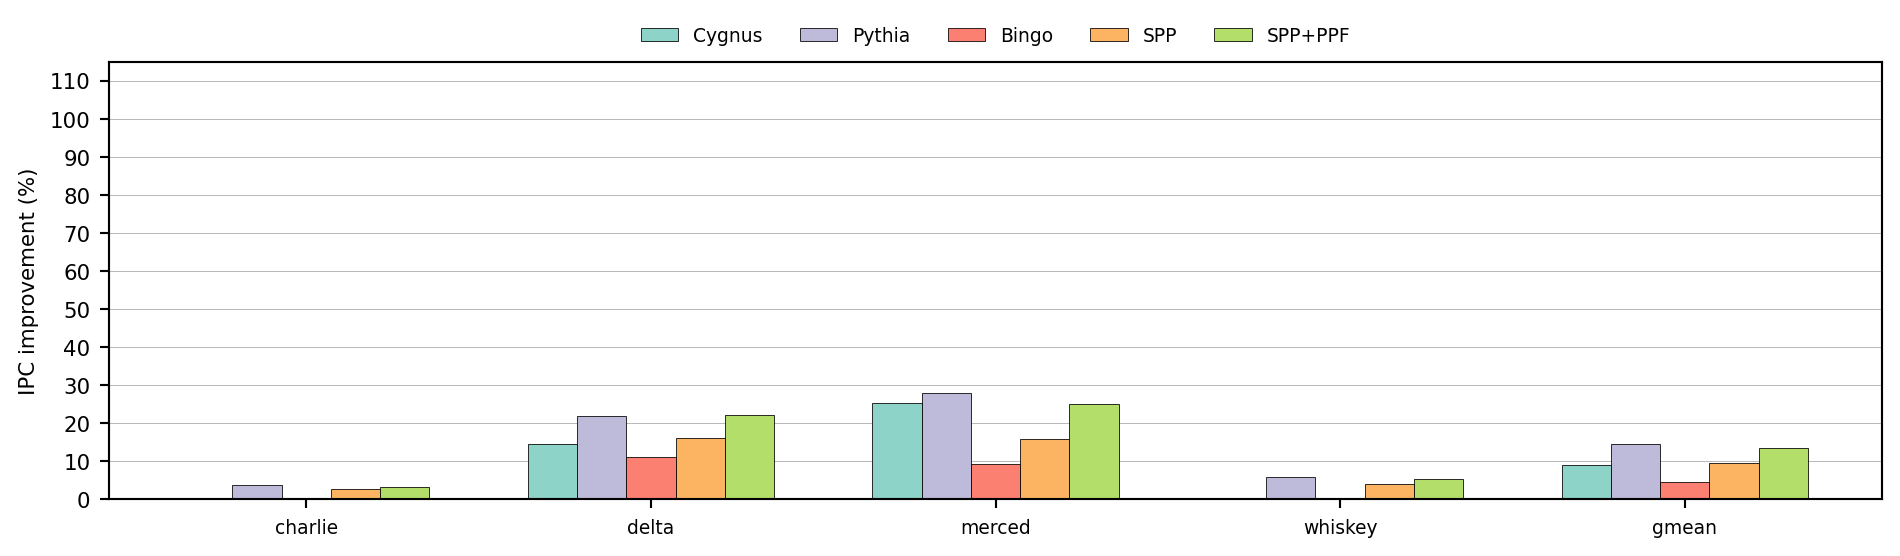

In [11]:
reload(plots)
plots.plot_everything(df_4core_4800mtps, 
                      suites=[(s, p) for s, p in suites if s != 'mixes'],
                      metrics=['ipc_improvement'], 
                      colors=colors, hatches=hatches,
                      legend_kwargs=df_4core_4800mtps_legend_kwargs,
                      label_kwargs=df_4core_4800mtps_label_kwargs,
                      add_suptitle=False,
                      add_xlabel=False,
                      ylabel='IPC improvement (%)',
                      ytick_distance=10,
                      ylim=(0, 115),
                      dpi=192, figsize=(10, 3))

#### Overpredictions

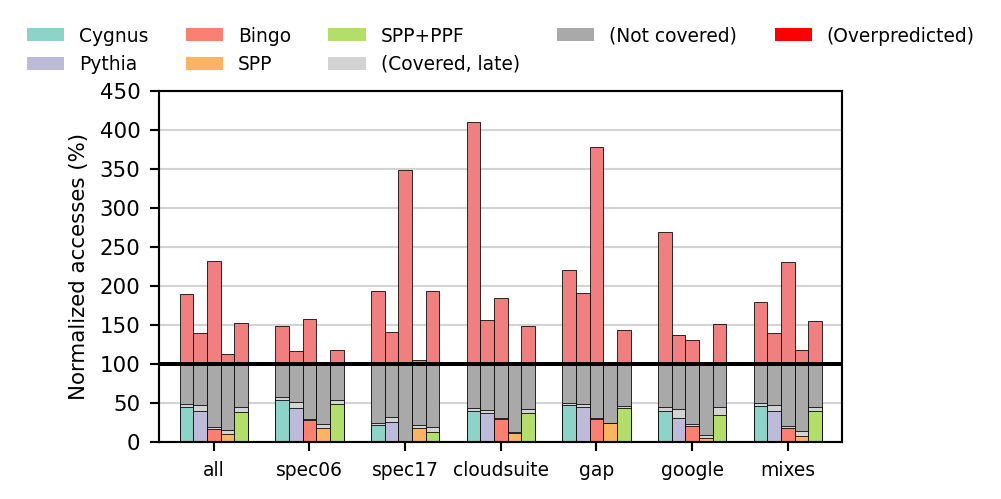

In [12]:
plots.plot_overprediction_means(df_4core_4800mtps, suites=suites,
                                colors=colors, hatches=hatches,
                                legend_kwargs=df_4core_4800mtps_legend_kwargs,
                                label_kwargs=df_4core_4800mtps_label_kwargs,
                                add_suptitle=False, add_xlabel=False,
                                ymin=0, ymax=450,
                                ytick_distance=50,
                                dpi=192, figsize=(5, 2.7))

=== spec06 weighted ===
=== spec17 weighted ===
=== cloudsuite weighted ===
=== gap one_phase ===
=== google one_phase ===


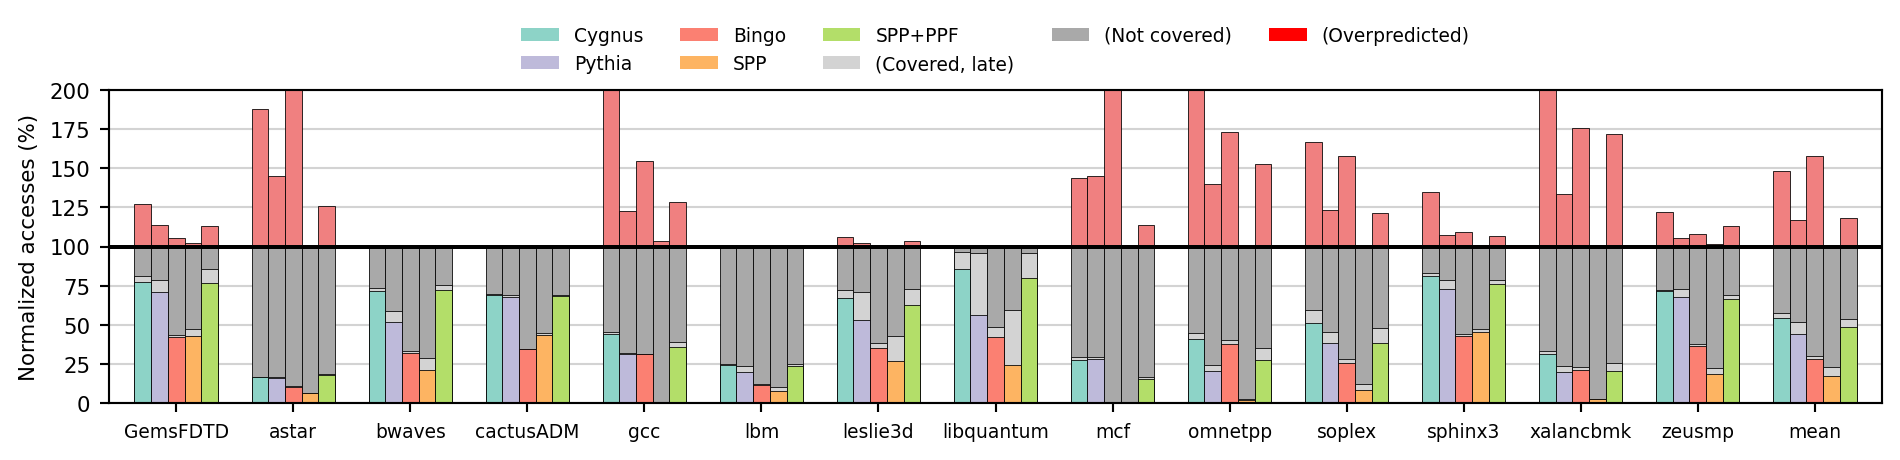

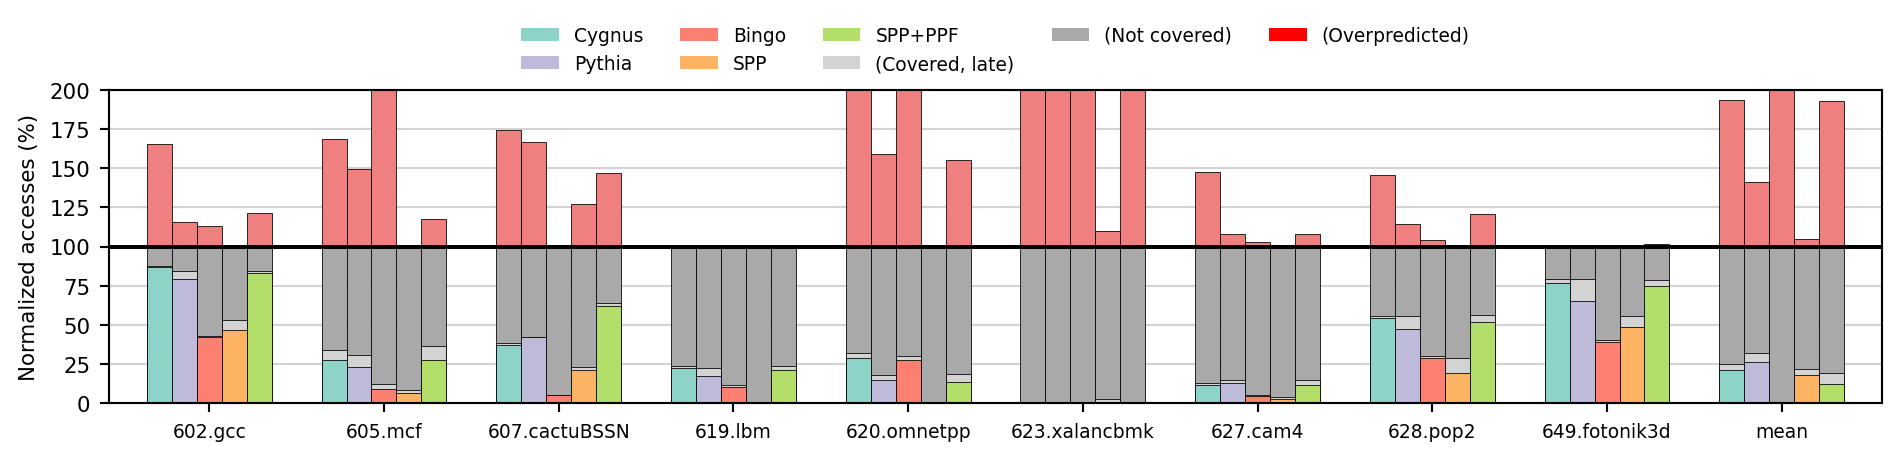

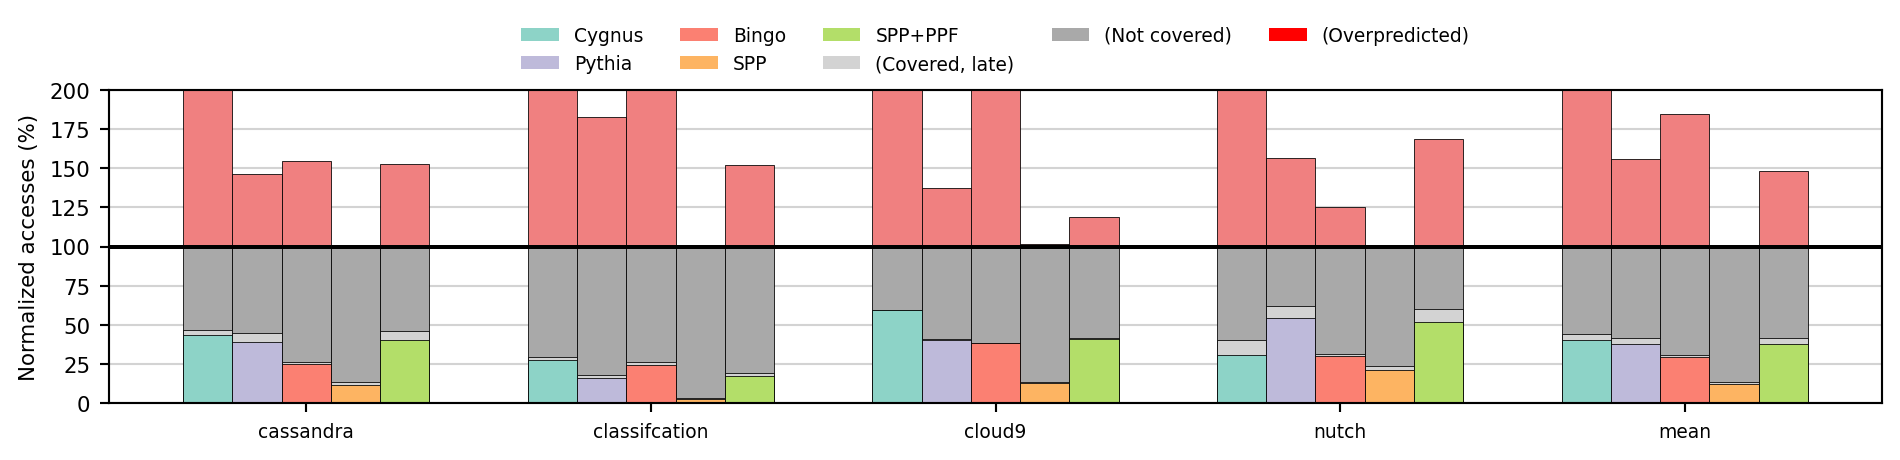

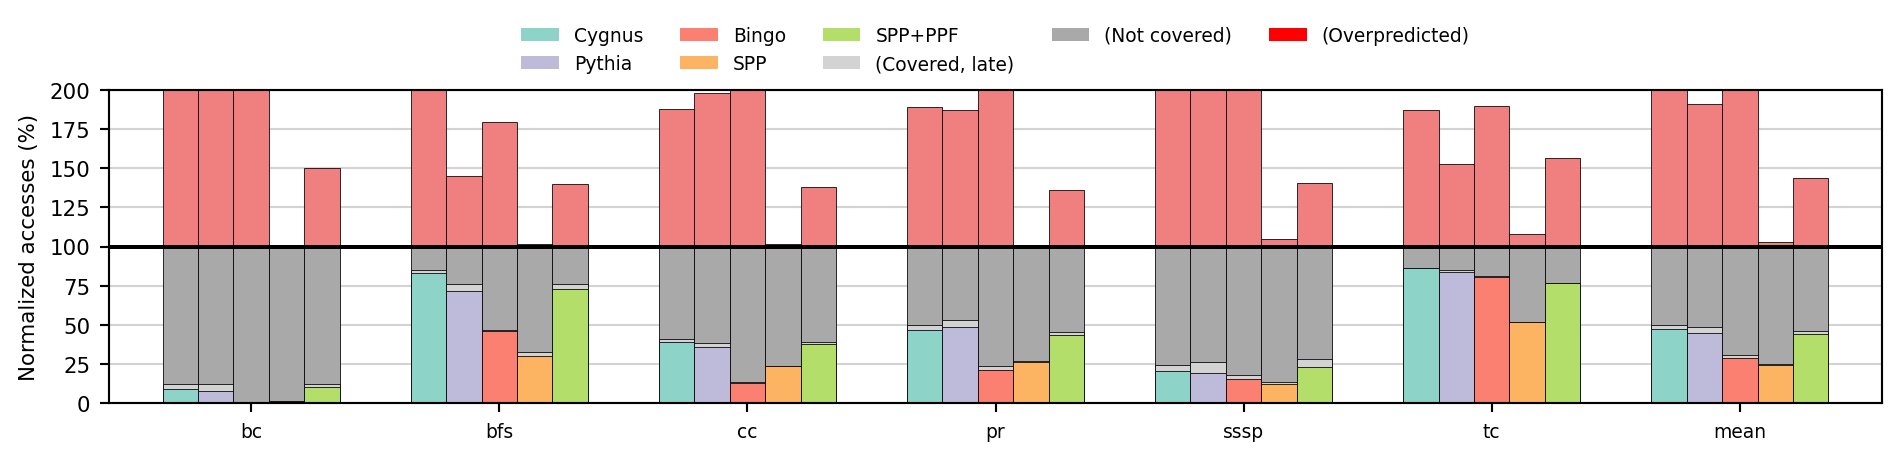

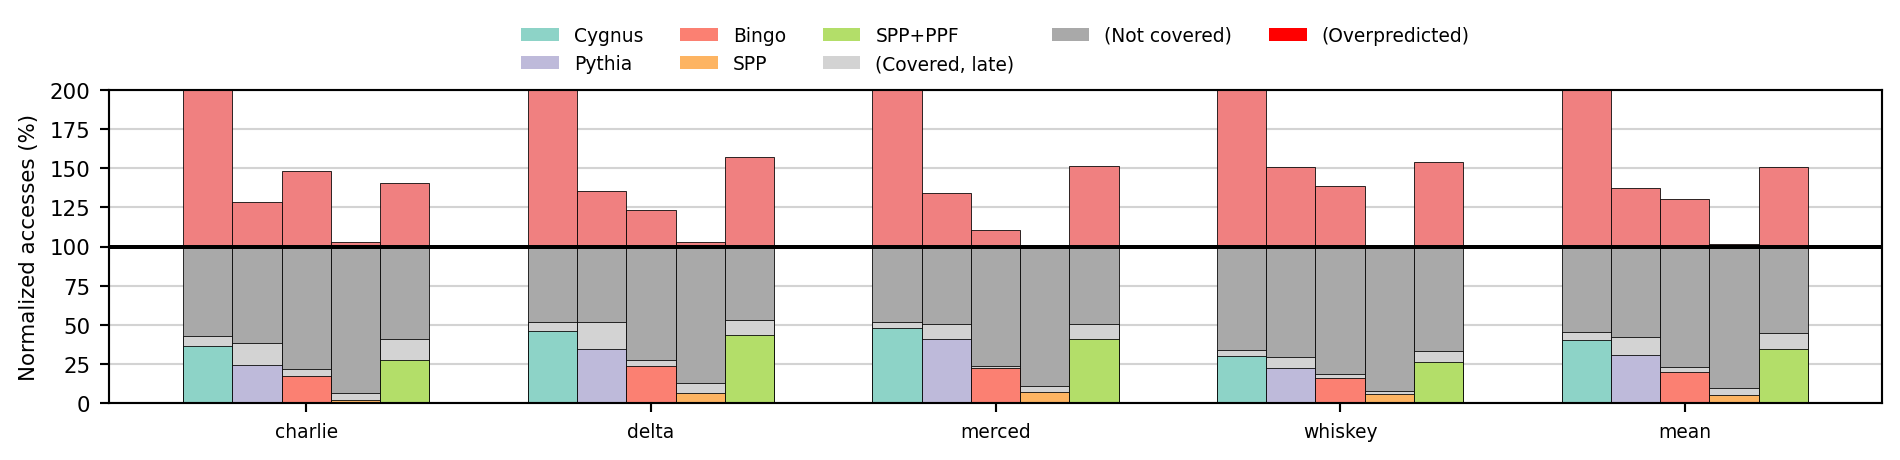

In [13]:
plots.plot_everything_overpredictions(df_4core_4800mtps, 
                                      suites=[(s, p) for s, p in suites if s != 'mixes'],
                                      level='L2C', 
                                      colors=colors, hatches=hatches,
                                      legend_kwargs=df_4core_4800mtps_legend_kwargs,
                                      label_kwargs=df_4core_4800mtps_label_kwargs,
                                      add_suptitle=False, add_xlabel=False,
                                      #ylabel='Prefetch coverage (%)',
                                      ytick_distance=25,
                                      ymin=0, ymax=200,
                                      annotate_outliers = False,
                                      dpi=192, figsize=(10, 2.5))

## Core sweep

In [22]:
def plot_core_sweep(data_df, suite='spec06', metric='ipc_improvement',
                    colors=defaultdict(lambda: None), 
                    linestyles=defaultdict(lambda: None),
                    markers=defaultdict(lambda: None),
                    legend_kwargs={}, 
                    dpi=None, figsize=None,
                    ylabel=None, ymin=None, ymax=None,
                    suptitle=""):
    
    # for k, v in data_df.items():
    #     print(k)
    #     display(v)
    # assert(suite in suites)
    table = tables.gen_table_metric_all(data_df, [(s, p) for (s, p) in suites if s != 'mixes'], metric)

    table['Scheme'] = table.index.to_series()
    table['Scheme'] =  table['Scheme'].apply(lambda x: ' '.join(x.split(' ')[:-1]))
    table['Core'] = table.index.to_series()
    table['Core'] = table['Core'].apply(lambda x: x.split(' ')[-1].rstrip('core'))
    # display(table)

    # Plot
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    X = np.arange(0, len(table['Core'].unique()), 1)
    for scheme in table['Scheme'].unique():
        y = np.zeros(len(X))
        for i, bw in enumerate(table['Core'].unique()):
            row = table.loc[(table['Scheme'] == scheme) & (table['Core'] == bw)]
            y[i] = row[suite].item()
        
        ax.plot(X, y, label=scheme, color=colors[scheme], marker='o',
                linewidth=2.0,)
                #ls=linestyles[scheme], marker=markers[scheme])

    # Axes
    ax.set_xlabel('Number of cores')
    ax.set_xticks(np.arange(0, len(table['Core'].unique()), 1))
    ax.set_xticklabels(table['Core'].unique())
    ax.set_ylabel(metric if ylabel is None else ylabel)
    ax.set_ylim(ymin=ymin, ymax=ymax)
    

    # Legend
    ax.legend(**legend_kwargs)

    # Grid
    ax.grid(axis='both', color='lightgray')
    ax.set_axisbelow(True)

    # Title
    # fig.suptitle(f'{suite} {metric}')
    fig.tight_layout()
    plt.show()

In [15]:
core_df = {
    # TODO: 1 core runs don't match w.r.t. instructions and use of mixes
    # TODO: Include heterogeneous mixes in multicore, but not single core.
    'Cygnus 1core': dfs['degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio']['Delta_Path, PC_Delta'],
    'Cygnus 2core': dfs['2core_2400mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio']['Delta_Path, PC_Delta'],
    'Cygnus 4core': dfs['4core_4800mtps_degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio']['Delta_Path, PC_Delta'],

    'Pythia 1core': dfs['degreedyn/pythia/bwaware3']['Delta_Path, PC_Delta'],
    'Pythia 2core': dfs['2core_2400mtps_degreedyn/pythia/bwaware3']['Delta_Path, PC_Delta'],
    'Pythia 4core': dfs['4core_4800mtps_degreedyn/pythia/bwaware3']['Delta_Path, PC_Delta'],

    'SPP 1core': dfs['degreedyn/baseline']['spp_dev2'],
    'SPP 2core': dfs['2core_2400mtps_degreedyn/baseline']['spp_dev2'],
    'SPP 4core': dfs['4core_4800mtps_degreedyn/baseline']['spp_dev2'],

    'SPP+PPF 1core': dfs['degreedyn/baseline']['spp_ppf_dev'],
    'SPP+PPF 2core': dfs['2core_2400mtps_degreedyn/baseline']['spp_ppf_dev'],
    'SPP+PPF 4core': dfs['4core_4800mtps_degreedyn/baseline']['spp_ppf_dev'],

    'Bingo 1core': dfs['degreedyn/baseline']['bingo'],
    'Bingo 2core': dfs['2core_2400mtps_degreedyn/baseline']['bingo'],
    'Bingo 4core': dfs['4core_4800mtps_degreedyn/baseline']['bingo'],
}

core_df_legend_kwargs = {
    'ncol': 5,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'fontsize': 6.75,
    'frameon': False,
}

### IPC improvement

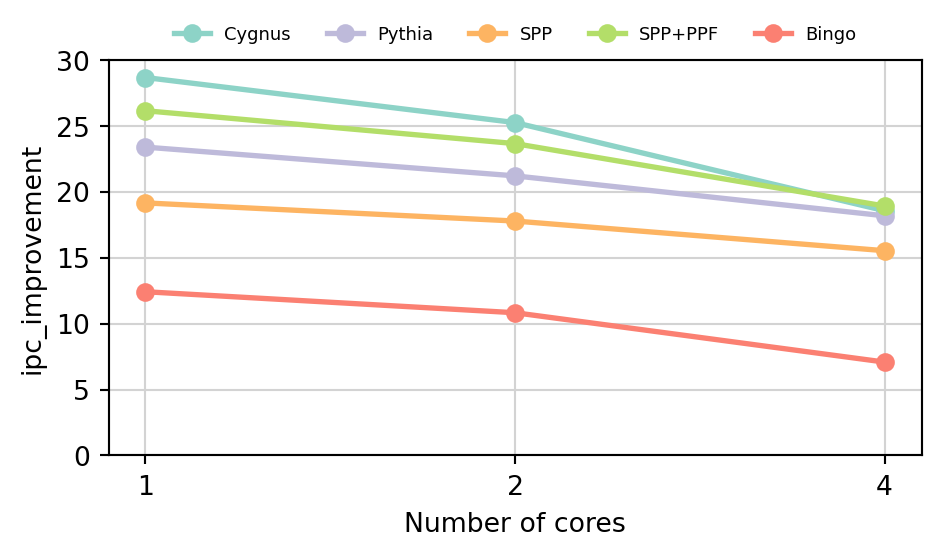

In [23]:
plot_core_sweep(core_df, suite='all', metric='ipc_improvement',
                colors=colors, 
                legend_kwargs=core_df_legend_kwargs,
                ymin=0, ymax=30,
                figsize=(5, 3), dpi=192)

### L2 accuracy

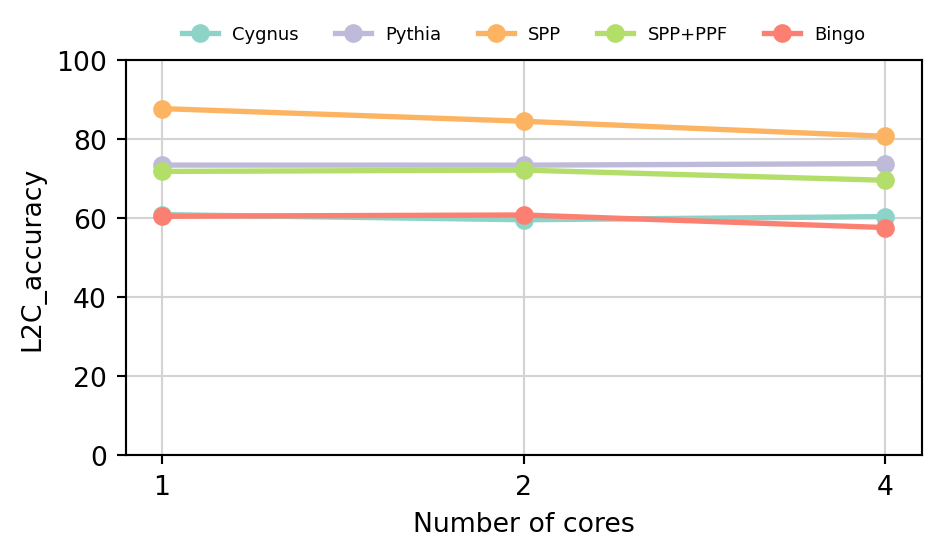

In [26]:
plot_core_sweep(core_df, suite='all', metric='L2C_accuracy',
                colors=colors, 
                legend_kwargs=core_df_legend_kwargs,
                ymin=0, ymax=100,
                figsize=(5, 3), dpi=192)

### L2 coverage

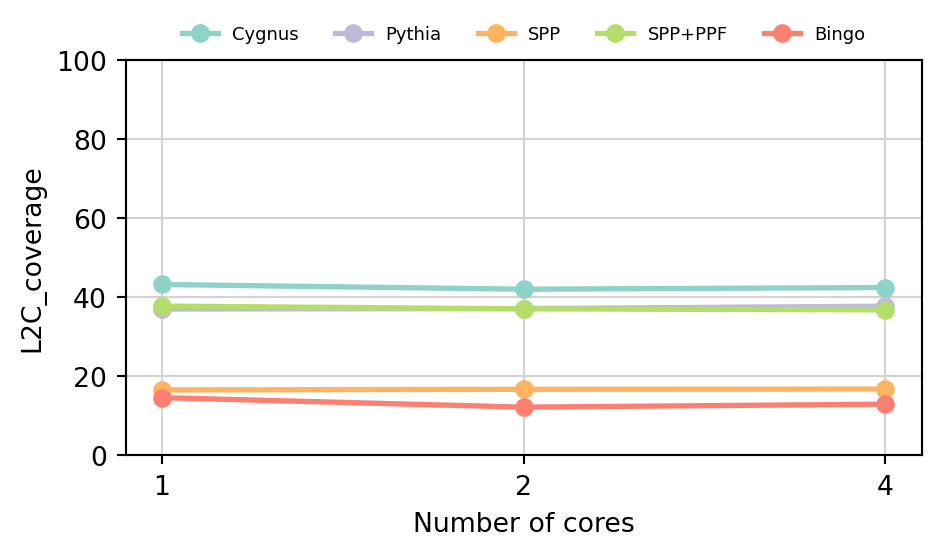

In [27]:
plot_core_sweep(core_df, suite='all', metric='L2C_coverage',
                colors=colors, 
                legend_kwargs=core_df_legend_kwargs,
                ymin=0, ymax=100,
                figsize=(5, 3), dpi=192)

# Tables

## 2-core

### 2400 MTPS

In [16]:
tables.table_everything(df_2core_2400mtps, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,Cygnus,Pythia,Bingo,SPP,SPP+PPF
run_name,,,,,
GemsFDTD_weighted,57.420606,46.850273,24.677871,46.254671,52.441241
astar_weighted,6.832881,6.543726,6.332167,3.664497,6.375037
bwaves_weighted,61.074790,40.426332,21.485930,42.456618,63.283729
cactusADM_weighted,10.378561,10.188374,4.027160,10.088570,10.584214
gcc_weighted,38.793873,19.129866,19.307662,7.827119,27.817718
lbm_weighted,19.513791,18.033150,10.918392,17.767115,21.774503
leslie3d_weighted,62.303546,50.451968,23.017950,51.614331,57.446954
libquantum_weighted,109.570912,83.717223,46.386816,92.687301,110.558228
mcf_weighted,24.770786,25.513996,-14.229804,1.532713,12.840727


=== spec17 weighted ===
ipc_improvement


,Cygnus,Pythia,Bingo,SPP,SPP+PPF
run_name,,,,,
602.gcc_weighted,73.871267,69.166508,32.522397,62.348068,72.393969
605.mcf_weighted,4.277784,2.286562,-12.005836,6.309356,8.687217
607.cactuBSSN_weighted,12.547326,12.630222,6.321297,10.642401,11.540349
619.lbm_weighted,10.373587,10.971949,6.489004,12.130761,11.286896
620.omnetpp_weighted,9.719745,4.842498,10.072724,0.589349,4.796402
623.xalancbmk_weighted,11.363549,9.121342,-2.037766,10.582172,9.413882
627.cam4_weighted,2.549256,2.261819,0.683246,1.718413,2.159465
628.pop2_weighted,17.148075,14.340630,6.823536,12.831305,16.544610
649.fotonik3d_weighted,96.015083,78.783004,31.018454,83.510939,90.832682


=== cloudsuite weighted ===
ipc_improvement


,Cygnus,Pythia,Bingo,SPP,SPP+PPF
run_name,,,,,
cassandra_weighted,13.813935,14.483487,8.837021,8.958856,15.431137
classifcation_weighted,-8.489218,-4.313509,-5.109951,-1.313013,-3.102717
cloud9_weighted,18.217663,10.204395,8.367706,4.886349,9.910556
nutch_weighted,6.048261,5.577029,3.118011,3.224967,5.579930
mean,6.896481,6.252818,3.647285,3.873924,6.736716


=== gap one_phase ===
ipc_improvement


,Cygnus,Pythia,Bingo,SPP,SPP+PPF
run_name,,,,,
bc,20.930333,20.206861,12.700136,11.579562,18.005148
bfs,60.209667,43.450722,22.580181,27.165760,46.281403
cc,35.679162,33.854095,16.911889,30.945172,35.423945
pr,1.740049,1.778223,0.432221,-0.157073,2.043700
sssp,30.853535,27.371370,21.021113,23.627484,28.162524
tc,23.352559,23.333894,21.557707,15.596748,19.985225
mean,27.602871,24.311736,15.598806,17.644162,24.187178


=== google one_phase ===
ipc_improvement


,Cygnus,Pythia,Bingo,SPP,SPP+PPF
run_name,,,,,
charlie,5.134364,5.704142,1.578804,3.233272,5.840783
delta,23.494278,22.968017,12.804395,17.597322,24.849238
merced,30.433331,28.030345,9.346649,16.401933,26.886080
whiskey,5.850715,8.365507,0.489090,4.741734,8.896171
mean,15.709357,15.883616,5.928635,10.299684,16.242886


=== mixes one_phase ===
ipc_improvement


,Cygnus,Pythia,Bingo,SPP,SPP+PPF
run_name,,,,,
mix_0,11.650563,11.447728,7.311244,6.698816,10.053688
mix_1,25.049921,22.485763,7.940971,19.328953,21.790839
mix_10,8.411186,3.965464,3.955748,2.689570,4.671795
mix_11,35.655704,31.432009,11.648743,24.962890,34.584645
mix_12,90.546816,65.927409,35.827074,56.060797,79.348035
...,...,...,...,...,...
mix_96,5.127558,6.838873,-8.004913,5.609319,3.324519
mix_97,40.350796,35.562628,13.156169,24.470665,35.130477
mix_98,6.973298,6.632802,8.377706,6.754512,9.053884


No mixes

In [17]:
suites_ = suites.copy()
suites_ = [(s, p) for (s, p) in suites_ if s != 'mixes']
tables.table_metric_all(df_2core_2400mtps, suites=suites_, metric='ipc_improvement')

,all,spec06,spec17,cloudsuite,gap,google
Cygnus,25.240065,35.247308,23.077404,6.896481,27.602871,15.709357
Pythia,21.199775,27.605071,20.032464,6.252818,24.311736,15.883616
Bingo,10.822061,14.507276,8.042820,3.647285,15.598806,5.928635
SPP,17.774887,23.868438,19.624868,3.873924,17.644162,10.299684
SPP+PPF,23.646188,32.742184,22.161804,6.736716,24.187178,16.242886


With mixes

In [18]:
tables.table_metric_all(df_2core_2400mtps, suites=suites, metric='ipc_improvement')

,all,spec06,spec17,cloudsuite,gap,google,mixes
Cygnus,24.366737,35.247308,23.077404,6.896481,27.602871,15.709357,24.027792
Pythia,20.681262,27.605071,20.032464,6.252818,24.311736,15.883616,20.479644
Bingo,7.453749,14.507276,8.042820,3.647285,15.598806,5.928635,6.168030
SPP,17.050840,23.868438,19.624868,3.873924,17.644162,10.299684,16.769669
SPP+PPF,23.112199,32.742184,22.161804,6.736716,24.187178,16.242886,22.904569


## 4-core
### 4800 MTPS

In [19]:
tables.table_everything(df_4core_4800mtps, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,Cygnus,Pythia,Bingo,SPP,SPP+PPF
run_name,,,,,
GemsFDTD_weighted,25.165424,23.610657,18.889634,24.738060,24.923030
astar_weighted,3.831374,4.108718,1.011829,2.203799,4.354344
bwaves_weighted,58.344781,44.517490,24.645395,49.290315,47.290008
cactusADM_weighted,8.886884,8.939624,2.578160,8.259178,9.131213
gcc_weighted,28.764472,17.607753,15.168859,7.365386,24.639860
lbm_weighted,7.040591,7.735720,5.957808,7.398533,9.681050
leslie3d_weighted,35.421103,31.107625,20.136270,31.172090,31.543885
libquantum_weighted,59.053795,65.198359,35.060426,72.689810,82.598164
mcf_weighted,19.491038,19.860994,-33.431701,0.660129,8.930427


=== spec17 weighted ===
ipc_improvement


,Cygnus,Pythia,Bingo,SPP,SPP+PPF
run_name,,,,,
602.gcc_weighted,75.491212,72.111023,30.904659,65.103102,75.130314
605.mcf_weighted,-3.813497,-3.228297,-24.935977,4.503208,-3.255676
607.cactuBSSN_weighted,7.217329,7.368546,1.438729,6.092557,6.707049
619.lbm_weighted,2.454818,4.632477,3.650559,NaN,4.365977
620.omnetpp_weighted,4.586753,2.370432,6.663500,0.371725,2.923296
623.xalancbmk_weighted,11.396538,9.580586,-2.254508,10.731272,9.695544
627.cam4_weighted,2.205891,1.793959,0.557978,1.611150,2.112947
628.pop2_weighted,17.278503,15.878280,7.249490,13.549125,18.028615
649.fotonik3d_weighted,58.713294,58.400305,22.178186,60.231729,65.060253


=== cloudsuite weighted ===
ipc_improvement


,Cygnus,Pythia,Bingo,SPP,SPP+PPF
run_name,,,,,
cassandra_weighted,9.681108,13.449653,7.486822,7.754570,14.106207
classifcation_weighted,-10.805013,-5.611648,-6.771187,-1.880350,-4.184070
cloud9_weighted,12.618538,7.249471,5.683970,3.371431,6.888936
nutch_weighted,4.037747,3.765612,2.043283,2.291763,3.900901
mean,3.470911,4.482257,1.958803,2.827250,4.972312


=== gap one_phase ===
ipc_improvement


,Cygnus,Pythia,Bingo,SPP,SPP+PPF
run_name,,,,,
bc,21.244009,20.249082,10.820920,12.004738,18.530937
bfs,55.116818,42.345405,19.470144,27.065740,44.376780
cc,38.767256,36.911851,16.711264,32.849073,37.363311
pr,2.964483,3.373489,1.245050,-0.207221,2.217864
sssp,31.433997,27.949255,19.352378,24.170945,28.587493
tc,22.440099,22.468033,20.722892,15.069352,19.405510
mean,27.640207,24.898146,14.506833,17.973291,24.305865


=== google one_phase ===
ipc_improvement


,Cygnus,Pythia,Bingo,SPP,SPP+PPF
run_name,,,,,
charlie,-0.341679,3.733732,-1.088523,2.547862,3.245720
delta,14.606874,21.839624,11.178572,16.072189,22.206936
merced,25.301249,27.858576,9.287375,15.914870,25.097746
whiskey,-1.637422,5.855157,-0.762517,4.102798,5.169677
mean,8.924954,14.363545,4.502909,9.474781,13.508134


=== mixes one_phase ===
ipc_improvement


,Cygnus,Pythia,Bingo,SPP,SPP+PPF
run_name,,,,,
mix_0,6.167937,6.818280,6.066063,5.826932,7.711092
mix_1,26.561500,21.722977,11.409642,11.134497,26.036989
mix_10,43.426694,32.963802,15.603617,22.996034,35.999627
mix_11,-5.819175,-0.073852,-11.455353,-4.385317,-2.788859
mix_12,4.283458,6.991086,-43.008690,-0.283175,9.935013
...,...,...,...,...,...
mix_96,58.034484,48.492763,21.903936,38.730295,51.064405
mix_97,54.955398,46.066587,18.777143,37.443309,49.023693
mix_98,6.641408,7.498046,1.523186,8.361849,7.311297


No mixes

In [20]:
suites_ = suites.copy()
suites_ = [(s, p) for (s, p) in suites_ if s != 'mixes']
tables.table_metric_all(df_4core_4800mtps, suites=suites_, metric='ipc_improvement')

,all,spec06,spec17,cloudsuite,gap,google
Cygnus,18.554647,24.174301,17.004494,3.470911,27.640207,8.924954
Pythia,18.171205,22.588895,16.397381,4.482257,24.898146,14.363545
Bingo,7.080572,8.559385,3.967553,1.958803,14.506833,4.502909
SPP,15.525993,19.284648,18.009138,2.827250,17.973291,9.474781
SPP+PPF,18.913543,24.249844,17.404184,4.972312,24.305865,13.508134


With mixes

In [21]:
tables.table_metric_all(df_4core_4800mtps, suites=suites, metric='ipc_improvement')

,all,spec06,spec17,cloudsuite,gap,google,mixes
Cygnus,24.382560,24.174301,17.004494,3.470911,27.640207,8.924954,26.732338
Pythia,22.360903,22.588895,16.397381,4.482257,24.898146,14.363545,24.034862
Bingo,7.537416,8.559385,3.967553,1.958803,14.506833,4.502909,7.716113
SPP,17.355731,19.284648,18.009138,2.827250,17.973291,9.474781,18.077160
SPP+PPF,23.805128,24.249844,17.404184,4.972312,24.305865,13.508134,25.766938
